<a href="https://colab.research.google.com/github/fashfaq2000/machine-learning/blob/main/Faisal_MLE_MiniProject_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [84]:
# Load the dataset into a pandas DataFrame
df  = pd.read_parquet('/content/drive/MyDrive/PythonDev/SampleData/yellow_tripdata_2022-01.parquet')

In [85]:
# Display the first 5 rows of the dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [86]:
# Drop rows with missing values.
df = df.dropna()

In [87]:
# Create new feature, 'trip_duration'.
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

In [88]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,1069.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,504.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,538.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,602.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,2252.0


In [89]:
# Create a list called feature_col to store column names The list should contain 'VendorID', 'trip_distance', 'payment_type', 'PULocationID', 'DOLocationID', and 'trip_duration'.
feature_cols = ['VendorID', 'trip_distance', 'payment_type', 'PULocationID', 'DOLocationID', 'trip_duration']

In [90]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df['total_amount'], test_size=0.2, random_state=42)

In [91]:
# Create a baseline for mean absolute error of total amount
mean_total_amount = y_train.mean()
y_pred_baseline = [mean_total_amount] * len(y_test)
print("Mean Total Amount:", mean_total_amount)

# Calculate the mean absolute error of the baseline model
mean_absolute_error_baseline = mean_absolute_error(y_test, y_pred_baseline)
print("Mean Absolute Error of Baseline Model", mean_absolute_error_baseline)

Mean Total Amount: 19.061963554799462
Mean Absolute Error of Baseline Model 9.198227928516678


In [92]:
# Use Scikit-Learn's ColumnTransformer to preprocess the categorical and
# continuous features independently.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['trip_distance', 'trip_duration']),
        ('cat', OneHotEncoder(), ['VendorID', 'payment_type', 'PULocationID', 'DOLocationID'])
    ])

In [93]:
# Create a pipeline object containing the column transformations and regression
# model.
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [94]:
# Fit the pipeline on the training data.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['trip_distance',
                                                   'trip_duration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['VendorID', 'payment_type',
                                                   'PULocationID',
                                                   'DOLocationID'])])),
                ('regressor', LinearRegression())])

In [95]:
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
print("Predicted Total Amount:", y_pred)

Predicted Total Amount: [14.45823827 15.56547173 19.11245    ... 16.37952993 17.30735059
 11.30916223]


In [96]:
# Build random forest regressor model
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)

In [97]:
# Fit the model to your training data (replace X_train and y_train with your actual training data)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [44]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
print("Predicted Total Amount:", y_pred_rf)

Predicted Total Amount: [12.47  13.466 16.4   ... 15.852 16.158 11.48 ]


In [101]:
# Define the hyperparameters to tune.
param_grid = {
    'n_estimators': [2, 4, 6],
    'max_depth': [None, 5, 10],
    'min_samples_split': [3, 5, 7]
}

In [102]:
# Select a smaller subset of the data
subset_size = int(0.2 * len(X_train))

X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

In [103]:
# Perform grid search to find the best hyperparameters.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [2, 4, 6]})

In [108]:
# Get the best model and the parameters.
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Params:", best_params)

Best Params: {'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 6}


In [105]:
# Fit the best classifier on the training data.
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=7, n_estimators=6,
                      random_state=42)

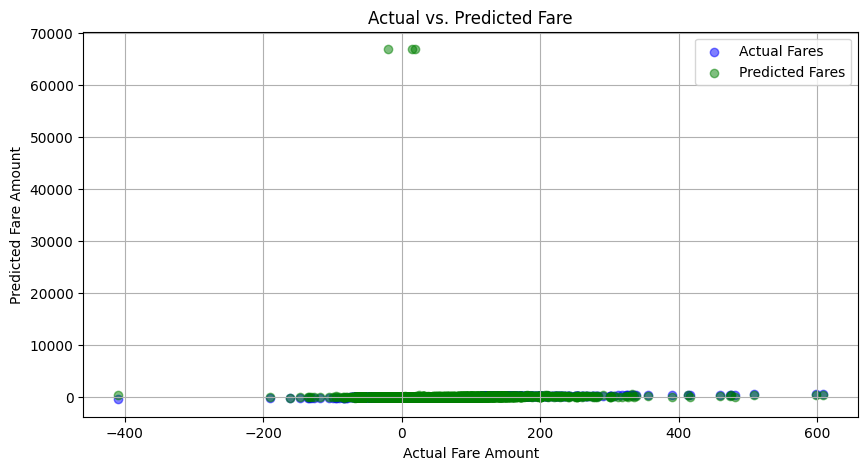

In [109]:
# Make predictions on the test data
y_pred_best_rf = best_rf_model.predict(X_test)

# Actual vs. Predicted Fare Amounts
plt.figure(figsize=(10, 5))

# Plot actual fares in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Fares')

# Plot predicted fares in green
plt.scatter(y_test, y_pred_best_rf, color='green', alpha=0.5, label='Predicted Fares')

plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs. Predicted Fare')
plt.grid(True)
plt.legend()
plt.show()